<a href="https://colab.research.google.com/github/adnan-math/Polarization-Reduction/blob/main/combineplot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Karate Data set**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Number of nodes: 34
Number of edges: 78


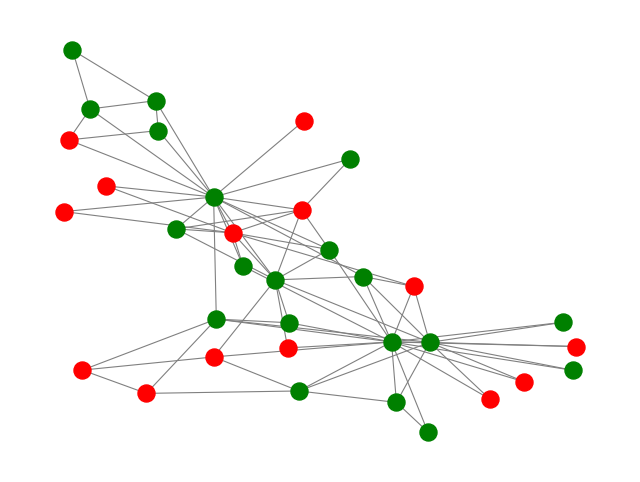

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import random

# Read the adjacency list from the file
graph = nx.read_adjlist("drive/MyDrive/karate.txt", delimiter=" ")

# Assign random opinions to each node
opinionss = {node: random.uniform(-1, 1) for node in graph.nodes()}

# Divide the network based on positive and negative opinions
positive_nodes = [node for node, opinion in opinionss.items() if opinion > 0]
negative_nodes = [node for node, opinion in opinionss.items() if opinion < 0]

# Plot the network with positive and negative nodes highlighted
pos = nx.spring_layout(graph)

plt.figure(figsize=(8, 6))

# Number of nodes
num_nodes = graph.number_of_nodes()

# Number of edges
num_edges = graph.number_of_edges()

# Print the results
print("Number of nodes:", num_nodes)
print("Number of edges:", num_edges)

# Draw positive nodes in green
nx.draw_networkx_nodes(graph, pos, nodelist=positive_nodes, node_color='green', node_size=150)

# Draw negative nodes in red
nx.draw_networkx_nodes(graph, pos, nodelist=negative_nodes, node_color='red', node_size=150)

# Draw edges
nx.draw_networkx_edges(graph, pos, edge_color='gray', width=0.8)

# Draw node labels
# nx.draw_networkx_labels(graph, pos, font_color='white', font_size=8)

# plt.title('Karate Network with Positive and Negative Nodes')
plt.axis('off')
# Save the figure as an image file (e.g., PNG or PDF)
plt.savefig('/content/kara1.png', dpi=1200, bbox_inches='tight')

# Download the saved image file to your local drive
# from google.colab import files
# files.download('/content/kara1.png')
plt.show()

In [ ]:
# Save the figure as an image file (e.g., PNG or PDF)
# plt.savefig('/content/kara1.png', dpi=1200, bbox_inches='tight')

# Download the saved image file to your local drive
from google.colab import files
files.download('/content/kara1.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

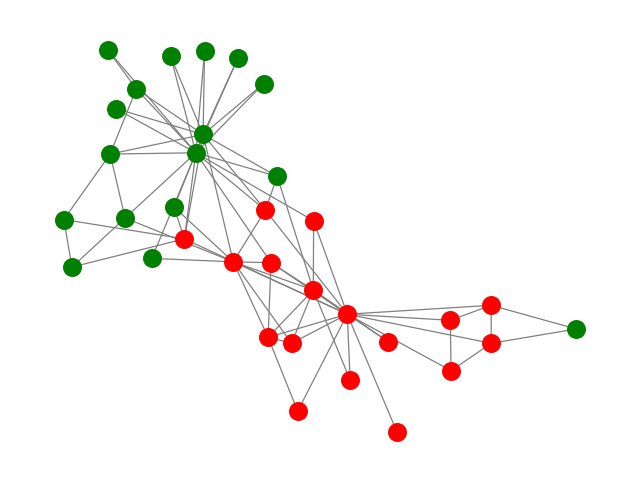

In [ ]:
import random
import numpy as np
np.random.seed(42)

# Assuming graph.nodes() returns a NodeView object
nodes = list(graph.nodes())  # Convert NodeView to a list

# Calculate the number of nodes
num_nodes = len(nodes)

# Calculate the number of nodes to assign values from -0.8 to -1
num_negative = num_nodes // 2

# Generate random values for half of the nodes in the range [-0.8, -1]
opinionss = {node: random.uniform(-1, -0.7) for node in nodes[:num_negative]}

# Generate random values for the other half of the nodes in the range [0.7, 1]
opinionss.update({node: random.uniform(0.8, 1) for node in nodes[num_negative:]})

# Print the opinions dictionary
# print(opinions)

# Divide the network based on positive and negative opinions
positive_nodes = [node for node, opinion in opinionss.items() if opinion > 0]
negative_nodes = [node for node, opinion in opinionss.items() if opinion < 0]

# Plot the network with positive and negative nodes highlighted
pos = nx.spring_layout(graph)

plt.figure(figsize=(8, 6))

# Draw positive nodes in green
nx.draw_networkx_nodes(graph, pos, nodelist=positive_nodes, node_color='green', node_size=160)

# Draw negative nodes in red
nx.draw_networkx_nodes(graph, pos, nodelist=negative_nodes, node_color='red', node_size=160)

# Draw edges
nx.draw_networkx_edges(graph, pos, edge_color='gray', width=0.9)

# Draw node labels
# nx.draw_networkx_labels(graph, pos, font_color='white', font_size=9)

# plt.title('Karate Network with Positive and Negative Nodes')
plt.axis('off')

# Save the figure as an image file (e.g., PNG or PDF)
plt.savefig('/content/kara.png', dpi=1200, bbox_inches='tight')

# Download the saved image file to your local drive
from google.colab import files
files.download('/content/kara.png')

plt.show()



In [ ]:
# Extract the opinions values and store them in separate lists
opinions = list(opinionss.values())

# Divide the network based on positive and negative opinions
positive_opinions = [opinion for opinion in opinions if opinion > 0]
negative_opinions = [opinion for opinion in opinions if opinion < 0]

Text(0.5, 1.0, 'Opinion distribution')

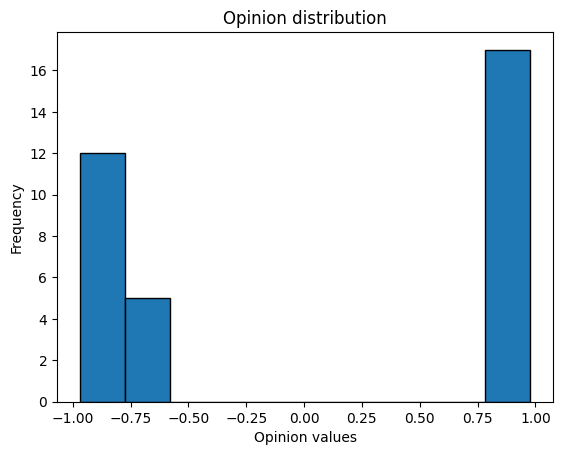

In [ ]:
# Create a histogram
plt.hist(opinions,  edgecolor='black')
# Create a histogram
# plt.hist(opinions, bins='auto', edgecolor='black')
plt.xlabel("Opinion values")
plt.ylabel("Frequency")
plt.title("Opinion distribution")

In [ ]:
# # Set the threshold to group the opinions
# threshold = 0.0

# # Group opinions based on the threshold
# group1 = [opinion for opinion in opinionss.values() if opinion > threshold]
# group2 = [opinion for opinion in opinionss.values() if opinion < -threshold]

# # Retrieve the nodes based on the final manipulated values
# nodes_group1 = [node for node, opinion in opinionss.items() if opinion in group1]
# nodes_group2 = [node for node, opinion in opinionss.items() if opinion in group2]

# print(list(zip(graph.nodes(), opinions)))

# # Print the groups and their respective nodes
# print("Group 1:", group1)
# print("Group 1 Nodes:", nodes_group1)
# print("Group 2:", group2)
# print("Group 2 Nodes:", nodes_group2)

In [ ]:
# Set the threshold to group the opinions
threshold = 0.0

# Group opinions based on the threshold
group1 = [opinion for opinion in opinionss.values() if opinion > threshold]
group2 = [opinion for opinion in opinionss.values() if opinion < -threshold]

# Retrieve the nodes based on the final manipulated values
nodes_group1 = [node for node, opinion in opinionss.items() if opinion in group1]
nodes_group2 = [node for node, opinion in opinionss.items() if opinion in group2]

print(list(zip(graph.nodes(), opinions)))

# Function to get opinion value from a node
def opinion_value(graph, node):
    for n, value in zip(graph.nodes(), opinions):
        if n == node:
            return value

# Create a set to store the unique edges within each group
edges_within_group1_set = set()
edges_within_group2_set = set()

# Number of edges between group1 and group2
edges_between_groups = sum(1 for node1 in nodes_group1 for node2 in nodes_group2 if graph.has_edge(node1, node2))

# Number of edges within group1
for node1 in nodes_group1:
    for neighbor in graph.neighbors(node1):
        if neighbor in nodes_group1 and neighbor != node1:
            edges_within_group1_set.add(tuple(sorted((node1, neighbor))))

# Number of edges within group2
for node1 in nodes_group2:
    for neighbor in graph.neighbors(node1):
        if neighbor in nodes_group2 and neighbor != node1:
            edges_within_group2_set.add(tuple(sorted((node1, neighbor))))

# Get the counts of unique edges within each group
edges_within_group1 = len(edges_within_group1_set)
edges_within_group2 = len(edges_within_group2_set)


# Print the results
print("Number of edges between group1 and group2:", edges_between_groups)
print("Number of edges within group1:", edges_within_group1)
print("Number of edges within group2:", edges_within_group2)

# Compute the sum of product of opinions for edges between group1 and group2
edge_opinion_sum_between_groups = sum(opinion_value(graph, node1) * opinion_value(graph, node2) for node1 in nodes_group1 for node2 in nodes_group2 if graph.has_edge(node1, node2))

# Compute the sum of product of opinions for edges within group1
edge_opinion_sum_within_group1 = 0.5*sum(opinion_value(graph, node1) * opinion_value(graph, node2) for node1 in nodes_group1 for node2 in nodes_group1 if node1 != node2 and graph.has_edge(node1, node2))

# Compute the sum of product of opinions for edges within group2
edge_opinion_sum_within_group2 = 0.5*sum(opinion_value(graph, node1) * opinion_value(graph, node2) for node1 in nodes_group2 for node2 in nodes_group2 if node1 != node2 and graph.has_edge(node1, node2))

# Print the results
print("Sum of product of opinions for edges between group1 and group2:", edge_opinion_sum_between_groups)
print("Sum of product of opinions for edges within group1:", edge_opinion_sum_within_group1)
print("Sum of product of opinions for edges within group2:", edge_opinion_sum_within_group2)

[('2', -0.8594472082676268), ('1', -0.7099104241554595), ('3', -0.9007879484516654), ('4', -0.7951448128732674), ('5', -0.7578711670861737), ('6', -0.8902660674668695), ('7', -0.8005973979220018), ('8', -0.7603744096009473), ('9', -0.9215840635414464), ('11', -0.7339544839343106), ('12', -0.9676929539942646), ('13', -0.9709922300897523), ('14', -0.7168266774926453), ('18', -0.8667057827585412), ('20', -0.9084106333013977), ('22', -0.816654246590067), ('32', -0.8722330244585552), ('31', 0.8380708520255451), ('10', 0.8499223251764711), ('28', 0.8554830213186475), ('29', 0.8614888458522167), ('33', 0.8641813296840288), ('17', 0.9300944362301845), ('34', 0.978880915373548), ('15', 0.8991501901047518), ('16', 0.9602129035621373), ('19', 0.9058666954073011), ('21', 0.8116288276271291), ('23', 0.9591143484936383), ('26', 0.9270274261075964), ('24', 0.8722641356661626), ('30', 0.8277041290158008), ('25', 0.8345070165854385), ('27', 0.9605918097789545)]
Number of edges between group1 and group2

## Proposed Method

In [ ]:
import numpy as np
# Sort the nodes based on the opinion values
nodes_group11 = [node for node, value in sorted(zip(graph.nodes(), opinions), key=lambda x: x[1]) if value in group1][::-1]
nodes_group22 = [node for node, value in sorted(zip(graph.nodes(), opinions), key=lambda x: x[1]) if value in group2]

n1 = len(nodes_group11)
n2 = len(nodes_group22)
N = 0.5 * (num_nodes * (num_nodes - 1) - n1 * (n1 - 1) - n2 * (n2 - 1))
print("N =", N)

# Define lists to store the results for different values of N
N_values = []
s_values = []
rho_values = []
polarization_values = []

# Loop over different values of N (e.g., 0.1, 0.2, 0.3, ..., 1.0)
for percent_top_nodes in range(0, 11):
    # Calculate the number of nodes to select from each list (percent_top_nodes% of the total number of nodes in each group)
    num_top_nodes_group1 = int(np.ceil(len(nodes_group11) * 25*percent_top_nodes / 100))
    num_top_nodes_group2 = int(np.ceil(len(nodes_group22) * 25*percent_top_nodes / 100))

    # Take the top percent_top_nodes% nodes from each list based on their opinion values
    top_nodes_group1 = nodes_group1[:num_top_nodes_group1]
    top_nodes_group2 = nodes_group2[:num_top_nodes_group2]

    # Compute the product of opinions for all pairs of selected nodes from the two lists
    opinion_product_pairs = []
    for node1 in top_nodes_group1:
        for node2 in top_nodes_group2:
            # Access the opinions directly from the NumPy array using indexing and handle missing opinions with 0
            opinion_product = opinion_value(graph, node1) * opinion_value(graph, node2)
            opinion_product_pairs.append((node1, node2, opinion_product))

    # Sort the list of node pairs based on the product of opinions in descending order
    opinion_product_pairs_sorted = sorted(opinion_product_pairs, key=lambda x: x[2], reverse=False)

    # Take the top percent_top_nodes% of the sorted list based on the product of opinions
    top_edges = int(N * percent_top_nodes *0.01)
    top_opinion_product_pairs = opinion_product_pairs_sorted[:top_edges]
    print("Top edges", len(top_opinion_product_pairs))

    # Create a new graph to add the edges
    # G_with_edges = graph.copy()

    # Initialize the variable to store the sum of product of opinions
    sum_product_opinions = 0

    # Now add edges between the nodes corresponding to the top_opinion_product_pairs
    for node1, node2, opinion_product in top_opinion_product_pairs:
        # G_with_edges.add_edge(node1, node2)
        sum_product_opinions += opinion_product
    print("sum_product_opinions", sum_product_opinions)
    # Count the number of edges in the graph G_with_edges
    # num_edges = G_with_edges.number_of_edges()
    num_edges = graph.number_of_edges()+ top_edges
    # Compute group means
    CG_minus = np.mean(group1)
    CG_plus = np.mean(group2)
    d = abs(CG_plus - CG_minus) / 2

    E = edges_between_groups + top_edges
    rho = E / N
    print(rho)

    s = (edge_opinion_sum_between_groups + edge_opinion_sum_within_group1 + sum_product_opinions
          + edge_opinion_sum_within_group2) / (num_edges)

    polarization = 0.5 * d * max((s + (1 - rho)), 0)
    print("polarization", polarization)
    print("s",s)
    # Store the values for this value of N
    N_values.append(percent_top_nodes)
    s_values.append(s)
    rho_values.append(rho)
    polarization_values.append(polarization)


N = 289.0
Top edges 0
sum_product_opinions 0
0.058823529411764705
polarization 0.5755597742382774
s 0.39070062988896626
Top edges 2
sum_product_opinions -1.55446289712552
0.0657439446366782
polarization 0.5599513665991485
s 0.3615023279276731
Top edges 5
sum_product_opinions -4.4052147673052096
0.07612456747404844
polarization 0.5349764309996252
s 0.31408957065101395
Top edges 8
sum_product_opinions -7.423948757128864
0.08650519031141868
polarization 0.5105868687799475
s 0.26803139970012213
Top edges 11
sum_product_opinions -10.186370294530352
0.09688581314878893
polarization 0.48878365816265107
s 0.22795818917762936
Top edges 14
sum_product_opinions -12.872719867684467
0.10726643598615918
polarization 0.4684671620356128
s 0.19132531808320546
Top edges 17
sum_product_opinions -15.526807379360585
0.11764705882352941
polarization 0.44929724860018044
s 0.15734570265240824
Top edges 20
sum_product_opinions -18.164761852039693
0.12802768166089964
polarization 0.43109749674296344
s 0.1256110

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

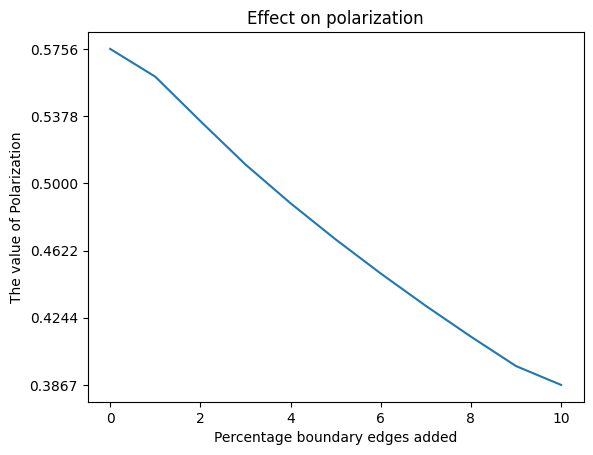

In [ ]:
x = [i for i in range(11)]
plt.plot(x, polarization_values)
plt.xlabel("Percentage boundary edges added")
plt.ylabel("The value of Polarization")
plt.title("Effect on polarization")

# Adjust the y-axis ticks
plt.yticks(np.linspace(min(polarization_values), max(polarization_values), 6))

# Save the figure as an image file (e.g., PNG or PDF)
plt.savefig('/content/pol.png', dpi=1200, bbox_inches='tight')

# Download the saved image file to your local drive
from google.colab import files
files.download('/content/pol.png')

plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

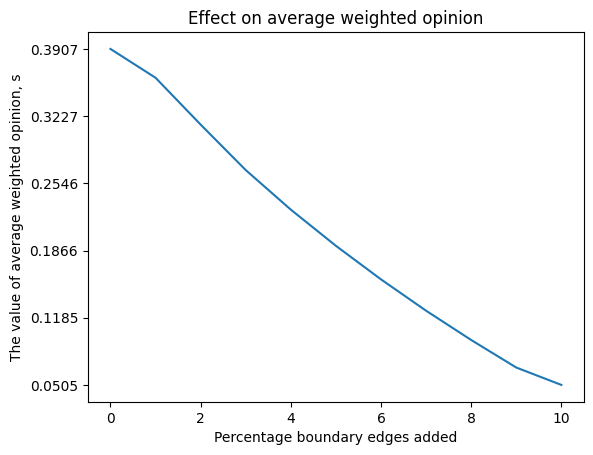

In [ ]:
plt.plot(x,s_values)

plt.xlabel("Percentage boundary edges added")
plt.ylabel("The value of average weighted opinion, s")
plt.title("Effect on average weighted opinion")

# Adjust the y-axis ticks
plt.yticks(np.linspace(min(s_values), max(s_values), 6))

# Save the figure as an image file (e.g., PNG or PDF)
plt.savefig('/content/s.png', dpi=1200, bbox_inches='tight')

# Download the saved image file to your local drive
from google.colab import files
files.download('/content/s.png')

plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

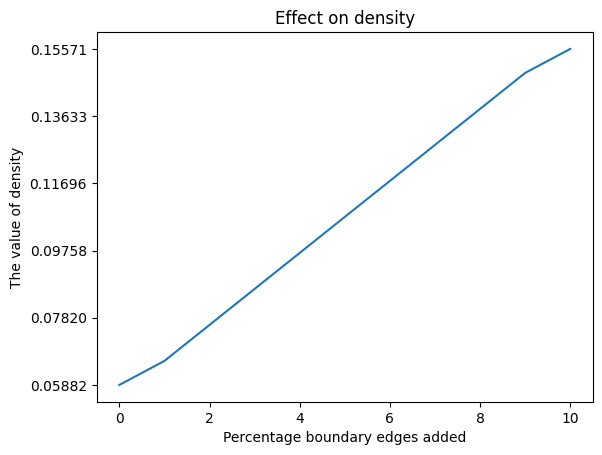

In [ ]:
# x = [0,1,2,3,4,5]
plt.plot(x,rho_values)

plt.xlabel("Percentage boundary edges added")
plt.ylabel("The value of density")
plt.title("Effect on density")

# Adjust the y-axis ticks
plt.yticks(np.linspace(min(rho_values), max(rho_values), 6))

# Save the figure as an image file (e.g., PNG or PDF)
plt.savefig('/content/rho.png', dpi=1200, bbox_inches='tight')

# Download the saved image file to your local drive
from google.colab import files
files.download('/content/rho.png')

plt.show()

# Betweeness Centrality

In [ ]:
# Function to get opinion value from a node
def opinion_value(graph, node):
    for n, value in zip(graph.nodes(), opinions):
        if n == node:
            return value

# Create a set to store the unique edges within each group
edges_within_group1_set = set()
edges_within_group2_set = set()

# Number of edges between group1 and group2
edges_between_groups = sum(1 for node1 in nodes_group1 for node2 in nodes_group2 if graph.has_edge(node1, node2))

# Number of edges within group1
for node1 in nodes_group1:
    for neighbor in graph.neighbors(node1):
        if neighbor in nodes_group1 and neighbor != node1:
            edges_within_group1_set.add(tuple(sorted((node1, neighbor))))

# Number of edges within group2
for node1 in nodes_group2:
    for neighbor in graph.neighbors(node1):
        if neighbor in nodes_group2 and neighbor != node1:
            edges_within_group2_set.add(tuple(sorted((node1, neighbor))))

# Get the counts of unique edges within each group
edges_within_group1 = len(edges_within_group1_set)
edges_within_group2 = len(edges_within_group2_set)

# Print the results
print("Number of edges between group1 and group2:", edges_between_groups)
print("Number of edges within group1:", edges_within_group1)
print("Number of edges within group2:", edges_within_group2)

# Compute the sum of product of opinions for edges between group1 and group2
edge_opinion_sum_between_groups = sum(opinion_value(graph, node1) * opinion_value(graph, node2) for node1 in nodes_group1 for node2 in nodes_group2 if graph.has_edge(node1, node2))

# Compute the sum of product of opinions for edges within group1
edge_opinion_sum_within_group1 = 0.5 * sum(opinion_value(graph, node1) * opinion_value(graph, node2) for node1 in nodes_group1 for node2 in nodes_group1 if node1 != node2 and graph.has_edge(node1, node2))

# Compute the sum of product of opinions for edges within group2
edge_opinion_sum_within_group2 = 0.5 * sum(opinion_value(graph, node1) * opinion_value(graph, node2) for node1 in nodes_group2 for node2 in nodes_group2 if node1 != node2 and graph.has_edge(node1, node2))

# Print the results
print("Sum of product of opinions for edges between group1 and group2:", edge_opinion_sum_between_groups)
print("Sum of product of opinions for edges within group1:", edge_opinion_sum_within_group1)
print("Sum of product of opinions for edges within group2:", edge_opinion_sum_within_group2)


# # Compute the sum of product of opinions for edges between group1 and group2
# edge_opinion_sum_between_groups = sum(opinion_value(graph, node1) * opinion_value(graph, node2) for node1 in nodes_group1 for node2 in nodes_group2 if graph.has_edge(node1, node2))

# # Compute the sum of product of opinions for edges within group1
# edge_opinion_sum_within_group1 = 0.5*sum(opinion_value(graph, node1) * opinion_value(graph, node2) for node1 in nodes_group1 for node2 in nodes_group1 if node1 != node2 and graph.has_edge(node1, node2))

# # Compute the sum of product of opinions for edges within group2
# edge_opinion_sum_within_group2 = 0.5*sum(opinion_value(graph, node1) * opinion_value(graph, node2) for node1 in nodes_group2 for node2 in nodes_group2 if node1 != node2 and graph.has_edge(node1, node2))

# # Print the results
# print("Sum of product of opinions for edges between group1 and group2:", edge_opinion_sum_between_groups)
# print("Sum of product of opinions for edges within group1:", edge_opinion_sum_within_group1)
# print("Sum of product of opinions for edges within group2:", edge_opinion_sum_within_group2)

Number of edges between group1 and group2: 17
Number of edges within group1: 27
Number of edges within group2: 34
Sum of product of opinions for edges between group1 and group2: -13.340882449619903
Sum of product of opinions for edges within group1: 21.89616377120447
Sum of product of opinions for edges within group2: 21.9193678097548


In [ ]:
import math as m
import networkx as nx
import matplotlib.pyplot as plt

# Define your graph and nodes_group1, nodes_group2, edge_opinion_sum_between_groups, edge_opinion_sum_within_group1, edge_opinion_sum_within_group2, num_edges, N, d here

def calculate_polarization(e_b):
    # Calculate the degree centrality for all nodes in the graph
    betweenness_centrality = nx.betweenness_centrality(graph)

    # Filter the degree centrality results based on the groups
    group1_centrality = {node: betweenness_centrality[node] for node in nodes_group1}
    group2_centrality = {node: betweenness_centrality[node] for node in nodes_group2}

    # Sort the nodes based on their degree centrality
    top_group1_nodes = sorted(group1_centrality, key=group1_centrality.get, reverse=True)[:m.ceil(m.sqrt(e_b))]
    top_group2_nodes = sorted(group2_centrality, key=group2_centrality.get, reverse=True)[:m.ceil(m.sqrt(e_b))]

    # Add edges between the top influential nodes from opposite groups
    edges = [(node1, node2) for node1 in top_group1_nodes for node2 in top_group2_nodes]

    # Convert edges list to set and back to list to remove duplicates
    edges = list(set(edges))

    # Limit the number of edges to not exceed max_edges
    if len(edges) > e_b:
        edges = edges[:e_b]

    print("Total edges after adding boundary edges:", len(edges))
    # Calculate the edges product for each unique edge
    edges_product = []
    for u, v in edges:
        product = opinion_value(graph, u) * opinion_value(graph, v)
        edges_product.append(product)

    num_edges = graph.number_of_edges()
    # print("Total unique edges after adding boundary edges:", len(edges))
    print("Edges product:", sum(edges_product))

    # Calculate polarization
    s = (edge_opinion_sum_between_groups + edge_opinion_sum_within_group1 + sum(edges_product)
         + edge_opinion_sum_within_group2) / (num_edges + len(edges))

    print("s =", s)

    rho = (len(edges_product) + edges_between_groups) / N
    print(rho)
    return s, rho

# List to store polarization, s, and rho values for different values of e_b
polariz_bet_values = []
s_bet_values = []
rho_bet_values = []

# List of different values of e_b
e_b_values = [int(N * i *0.01) for i in range(0,11)]  # Add more values as needed

# Loop through different values of e_b and calculate polarization, s, and rho
for e_b in e_b_values:
    # print(e_b)
    s, rho = calculate_polarization(e_b)
    s_bet_values.append(s)
    rho_bet_values.append(rho)
    polarization = 0.5 * d * max(s + (1 - rho), 0)
    print("polarization",polarization)
    polariz_bet_values.append(polarization)


Total edges after adding boundary edges: 0
Edges product: 0
s = 0.39070062988896626
0.058823529411764705
polarization 0.5755597742382774
Total edges after adding boundary edges: 2
Edges product: -1.3919354613595265
s = 0.363533920874748
0.0657439446366782
polarization 0.5608293028423225
Total edges after adding boundary edges: 5
Edges product: -3.578965933771218
s = 0.32404437587431506
0.07612456747404844
polarization 0.5392783184972452
Total edges after adding boundary edges: 8
Edges product: -5.818538636750671
s = 0.2866989592394034
0.08650519031141868
polarization 0.5186539016541959
Total edges after adding boundary edges: 11
Edges product: -8.21449951812215
s = 0.25011404059794623
0.09688581314878893
polarization 0.4983581277867368
Total edges after adding boundary edges: 14
Edges product: -10.514294099417945
s = 0.2169603807817546
0.10726643598615918
polarization 0.47954514430145
Total edges after adding boundary edges: 17
Edges product: -12.477611839248832
s = 0.18944249781147932

# **Degree Centrality**

In [ ]:
def calculate_polariz(e_b):
    # Calculate the degree centrality for all nodes in the graph
    degree_centrality = nx.degree_centrality(graph)

    # Filter the degree centrality results based on the groups
    group1_centrality = {node: degree_centrality[node] for node in nodes_group1}
    group2_centrality = {node: degree_centrality[node] for node in nodes_group2}


    # Sort the nodes based on their degree centrality
    top_group1_nodes = sorted(group1_centrality, key=group1_centrality.get, reverse=True)[:m.ceil(m.sqrt(e_b))]
    top_group2_nodes = sorted(group2_centrality, key=group2_centrality.get, reverse=True)[:m.ceil(m.sqrt(e_b))]

    # Add edges between the top influential nodes from opposite groups
    edges = [(node1, node2) for node1 in top_group1_nodes for node2 in top_group2_nodes]

    # Convert edges list to set and back to list to remove duplicates
    edges = list(set(edges))

    # Limit the number of edges to not exceed max_edges
    if len(edges) > e_b:
        edges = edges[:e_b]

    print("Total edges after adding boundary edges:", len(edges))
    # Calculate the edges product for each unique edge
    edges_product = []
    for u, v in edges:
        product = opinion_value(graph, u) * opinion_value(graph, v)
        edges_product.append(product)

    num_edges = graph.number_of_edges()
    # print("Total unique edges after adding boundary edges:", len(edges))
    print("Edges product:", sum(edges_product))

    # Calculate polarization
    ss = (edge_opinion_sum_between_groups + edge_opinion_sum_within_group1 + sum(edges_product)
          + edge_opinion_sum_within_group2) / (num_edges + len(edges))

    print("s =", ss)

    rhoo = (len(edges_product) + edges_between_groups) / N
    print(rhoo)
    return ss, rhoo




# List to store polarization, s, and rho values for different values of e_b
polariz_deg_values = []
s_deg_values = []
rho_deg_values = []

# List of different values of e_b
e_b_values = [int(N * i *0.01) for i in range(0,11)]  # Add more values as needed

# Loop through different values of e_b and calculate polarization, s, and rho
for e_b in e_b_values:
    # print(e_b)
    ss, rhoo = calculate_polariz(e_b)
    s_deg_values.append(ss)
    rho_deg_values.append(rhoo)
    polarization1 = 0.5 * d * max(ss + (1 - rhoo), 0)
    print("polarization",polarization1)
    polariz_deg_values.append(polarization1)

Total edges after adding boundary edges: 0
Edges product: 0
s = 0.39070062988896626
0.058823529411764705
polarization 0.5755597742382774
Total edges after adding boundary edges: 2
Edges product: -1.3919354613595265
s = 0.363533920874748
0.0657439446366782
polarization 0.5608293028423225
Total edges after adding boundary edges: 5
Edges product: -3.6152964796986784
s = 0.3236066584535023
0.07612456747404844
polarization 0.5390891625009353
Total edges after adding boundary edges: 8
Edges product: -5.825487328439552
s = 0.28661816049883504
0.08650519031141868
polarization 0.5186189851406051
Total edges after adding boundary edges: 11
Edges product: -7.732474741932024
s = 0.2555300493191836
0.09688581314878893
polarization 0.5006986115714277
Total edges after adding boundary edges: 14
Edges product: -9.97144474145895
s = 0.22286091728130888
0.10726643598615918
polarization 0.48209501279483524
Total edges after adding boundary edges: 17
Edges product: -12.174122356749677
s = 0.19263712394304

# Randomness

In [ ]:
import random

def polarize_random(e_b):
    # Randomly select nodes from each group for edge addition
    group1_nodes = random.sample(nodes_group1, 15)
    group2_nodes = random.sample(nodes_group2, 15)

    # Add edges between the randomly selected nodes from opposite groups
    edges = [(node1, node2) for node1 in group1_nodes for node2 in group2_nodes]

    # Convert edges list to set and back to list to remove duplicates
    edges = list(set(edges))

    # Limit the number of edges to not exceed max_edges
    if len(edges) > e_b:
        edges = edges[:e_b]

    print("Total edges after adding boundary edges:", len(edges))
    # Calculate the edges product for each unique edge
    edges_product = []
    for u, v in edges:
        product = opinion_value(graph, u) * opinion_value(graph, v)
        edges_product.append(product)

    num_edges = graph.number_of_edges()
    # print("Total unique edges after adding boundary edges:", len(edges))
    print("Edges product:", sum(edges_product))

    # Calculate polarization
    sss = (edge_opinion_sum_between_groups + edge_opinion_sum_within_group1 + sum(edges_product)
          + edge_opinion_sum_within_group2) / (num_edges + len(edges))

    print("s =", sss)

    rhooo = (len(edges_product) + edges_between_groups) / N
    print("rho =", rhooo)
    return sss, rhooo


# List to store polarization, s, and rho values for different values of e_b
polariz_rand_values = []
s_rand_values = []
rho_rand_values = []

# List of different values of e_b
e_b_values = [int(N * i *0.01) for i in range(0,11)]  # Add more values as needed

# Loop through different values of e_b and calculate polarization, s, and rho
for e_b in e_b_values:
    # print(e_b)
    sss, rhooo = polarize_random(e_b)
    s_rand_values.append(sss)
    rho_rand_values.append(rhooo)
    polarization2 = 0.5 * d * max(sss + (1 - rhooo), 0)
    print("polarization",polarization2)
    polariz_rand_values.append(polarization2)


Total edges after adding boundary edges: 0
Edges product: 0
s = 0.39070062988896626
rho = 0.058823529411764705
polarization 0.5755597742382774
Total edges after adding boundary edges: 2
Edges product: -1.4273635203785373
s = 0.36309107013701036
rho = 0.0657439446366782
polarization 0.560637928525171
Total edges after adding boundary edges: 5
Edges product: -3.786791566680326
s = 0.3215404525862535
rho = 0.07612456747404844
polarization 0.538196268567961
Total edges after adding boundary edges: 8
Edges product: -5.764752544820695
s = 0.2873243789130078
rho = 0.08650519031141868
polarization 0.5189241716408298
Total edges after adding boundary edges: 11
Edges product: -8.037083335815673
s = 0.25210748084858087
rho = 0.09688581314878893
polarization 0.4992195766548056
Total edges after adding boundary edges: 14
Edges product: -10.495868334645776
s = 0.217160660833626
rho = 0.10726643598615918
polarization 0.4796316936845711
Total edges after adding boundary edges: 17
Edges product: -12.37

# Combine plot

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

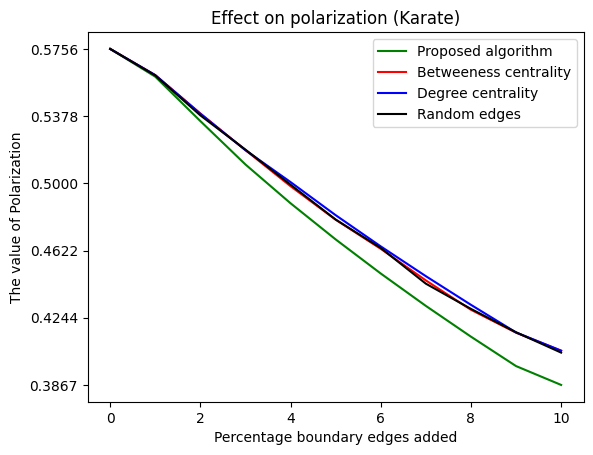

In [ ]:
x = [i for i in range(11)]

plt.plot(x, polarization_values, label="Proposed algorithm", color = "green")
plt.plot(x, polariz_bet_values, label="Betweeness centrality",color="red")
plt.plot(x, polariz_deg_values, label="Degree centrality", color="blue")
plt.plot(x, polariz_rand_values, label="Random edges", color="black" )

plt.xlabel("Percentage boundary edges added")
plt.ylabel("The value of Polarization")
plt.title("Effect on polarization (Karate)")

# Adjust the y-axis ticks
min_value = min(min(polariz_bet_values), min(polarization_values))
max_value = max(max(polariz_bet_values), max(polarization_values))
plt.yticks(np.linspace(min_value, max_value, 6))

plt.legend()

# Save the figure as an image file (e.g., PNG or PDF)
plt.savefig('/content/pol.png', dpi=1200, bbox_inches='tight')

# Download the saved image file to your local drive
from google.colab import files
files.download('/content/pol.png')

plt.show()


In [ ]:
# x = [i for i in range(11)]

# plt.plot(x, polarization_values, label="Proposed algorithm", color = "green")
# plt.plot(x, polariz_bet_values, label="Betweeness centrality",color="red")
# plt.plot(x, polariz_deg_values, label="Degree centrality", color="blue")
# plt.plot(x, polariz_rand_values, label="Random edges", color="black")

# plt.xlabel("Percentage boundary edges added")
# plt.ylabel("The value of Polarization")
# plt.title("Effect on polarization (PolBlogs)")

# # Adjust the y-axis ticks
# min_value = min(min(polariz_bet_values), min(polarization_values))
# max_value = max(max(polariz_bet_values), max(polarization_values))
# plt.yticks(np.linspace(min_value, max_value, 6))

# # Save the figure as an image file (e.g., PNG or PDF)
# plt.savefig('/content/sample_figure.png', dpi=1200, bbox_inches='tight')

# # Download the saved image file to your local drive
# from google.colab import files
# files.download('/content/sample_figure.png')

# plt.legend()
# plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

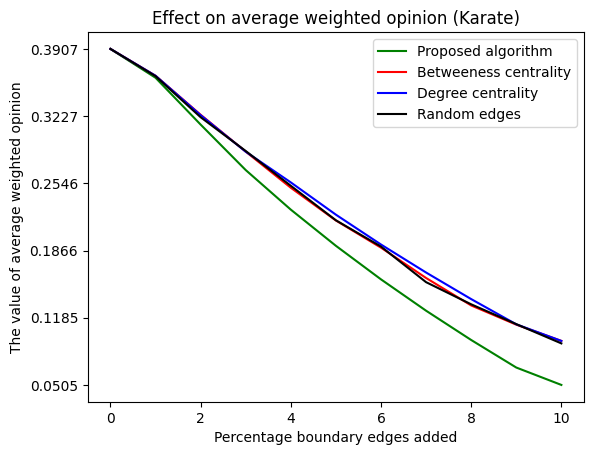

In [ ]:
Px = [i for i in range(11)]

plt.plot(x, s_values, label="Proposed algorithm", color = "green" )
plt.plot(x, s_bet_values, label="Betweeness centrality",color="red" )
plt.plot(x, s_deg_values, label="Degree centrality", color="blue" )
plt.plot(x, s_rand_values, label="Random edges", color="black" )

plt.xlabel("Percentage boundary edges added")
plt.ylabel("The value of average weighted opinion")
plt.title("Effect on average weighted opinion (Karate)")

# Adjust the y-axis ticks
min_value = min(min(s_bet_values), min(s_values))
max_value = max(max(s_bet_values), max(s_values))
plt.yticks(np.linspace(min_value, max_value, 6))

plt.legend()

# Save the figure as an image file (e.g., PNG or PDF)
plt.savefig('/content/s.png', dpi=1200, bbox_inches='tight')

# Download the saved image file to your local drive
from google.colab import files
files.download('/content/s.png')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

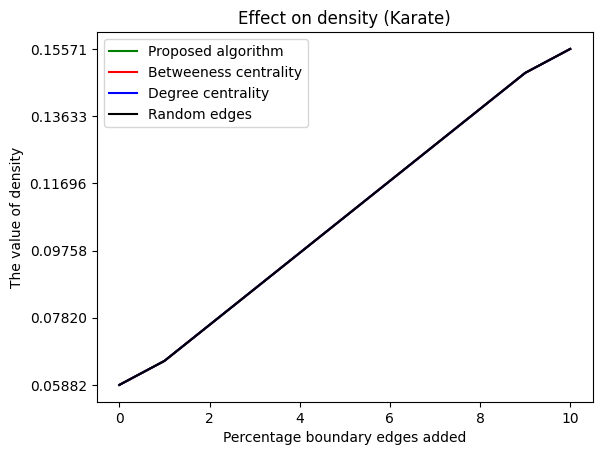

In [ ]:
plt.plot(x, rho_values, label="Proposed algorithm", color = "green" )
plt.plot(x, rho_bet_values, label="Betweeness centrality",color="red" )
plt.plot(x, rho_deg_values, label="Degree centrality", color="blue" )
plt.plot(x, rho_rand_values, label="Random edges", color="black" )

plt.xlabel("Percentage boundary edges added")
plt.ylabel("The value of density")
plt.title("Effect on density (Karate)")

# Adjust the y-axis ticks
min_value = min(min(rho_bet_values), min(rho_values))
max_value = max(max(rho_bet_values), max(rho_values))
plt.yticks(np.linspace(min_value, max_value, 6))

plt.legend()

# Save the figure as an image file (e.g., PNG or PDF)
plt.savefig('/content/rho.png', dpi=1200, bbox_inches='tight')

# Download the saved image file to your local drive
from google.colab import files
files.download('/content/rho.png')
plt.show()

In [ ]:
# import math as m
# import networkx as nx
# import matplotlib.pyplot as plt
# import random
# import numpy as np

# # Create a simple graph for demonstration
# graph = nx.Graph()
# graph.add_nodes_from(range(1, 11))
# group1 = [1, 2, 3, 4, 5]
# group2 = [6, 7, 8, 9, 10]

# # Add initial edges to the graph
# graph.add_edges_from([(1, 2), (1, 3), (2, 4), (3, 5), (6, 7), (7, 8), (8, 9), (9, 10)])

# # Define opinions for nodes
# opinions = {1: 0.2, 2: 0.3, 3: -0.1, 4: -0.2, 5: 0.1, 6: -0.3, 7: -0.4, 8: 0.2, 9: 0.3, 10: -0.1}

# # Define the threshold to group the opinions
# threshold = 0.0

# # Group opinions based on the threshold
# group1 = [opinion for opinion in opinions.values() if opinion > threshold]
# group2 = [opinion for opinion in opinions.values() if opinion < -threshold]

# # Retrieve the nodes based on the final manipulated values
# nodes_group1 = [node for node, opinion in opinions.items() if opinion in group1]
# nodes_group2 = [node for node, opinion in opinions.items() if opinion in group2]

# Function to get opinion value from a node
# def opinion_value(graph, node):
#     for n, value in zip(graph.nodes(), opinions):
#         if n == node:
#             return value

# # Calculate the sum of product of opinions for edges within group1
# edge_opinion_sum_within_group1 = 0.5 * sum(opinion_value(graph, node1) * opinion_value(graph, node2) for node1 in nodes_group1 for node2 in nodes_group1 if node1 != node2 and graph.has_edge(node1, node2))

# # Calculate the sum of product of opinions for edges within group2
# edge_opinion_sum_within_group2 = 0.5 * sum(opinion_value(graph, node1) * opinion_value(graph, node2) for node1 in nodes_group2 for node2 in nodes_group2 if node1 != node2 and graph.has_edge(node1, node2))

# # Define the state space as the current graph configuration
# def get_state(graph):
#     return tuple(sorted(graph.edges()))

# # All possible edge additions between groups
# all_possible_actions = [(i, j) for i in group1 for j in group2 if not graph.has_edge(i, j)]

# # Initialize the Q-table for all state-action pairs
# Q = {}
# for edge in all_possible_actions:
#     for action in all_possible_actions:
#         Q[(get_state(graph), edge, action)] = 0.0

# # Define the exploration-exploitation strategy (epsilon-greedy)
# epsilon = 0.3  # Exploration probability

# def choose_action(state):
#     if random.uniform(0, 1) < epsilon:
#         return random.choice(all_possible_actions)
#     else:
#         max_action = None
#         max_q_value = float('-inf')
#         for action in all_possible_actions:
#             q_value = Q.get((state, action), 0)
#             if q_value > max_q_value:
#                 max_q_value = q_value
#                 max_action = action
#         return max_action

# # Define the learning parameters
# alpha = 0.1  # Learning rate
# gamma = 0.9  # Discount factor


# # Define the reward function based on the impact on polarization
# def get_reward(graph, new_edge):
#     G_with_edges = graph.copy()
#     G_with_edges.add_edge(*new_edge)

#     # Calculate polarization for the modified graph
#     def calculate_polarization(graph):
#         edges_between_groups = sum(1 for node1 in nodes_group1 for node2 in nodes_group2 if graph.has_edge(node1, node2))
#         N = 0.5 * (graph.number_of_nodes() * (graph.number_of_nodes() - 1) - len(nodes_group1) * (len(nodes_group1) - 1) - len(nodes_group2) * (len(nodes_group2) - 1))
#         s = (edge_opinion_sum_within_group1 + edge_opinion_sum_within_group2) / (graph.number_of_edges() + graph.number_of_edges())
#         rho = (edges_between_groups + graph.number_of_edges()) / N
#         return s, rho

#     s, rho = calculate_polarization(G_with_edges)
#     polarization = 0.5 * d * max(s + (1 - rho), 0)
#     return polarization

# # Run the Q-learning algorithm
# num_episodes = 1000
# max_steps_per_episode = 5

# for episode in range(num_episodes):
#     graph = nx.Graph()  # Reset the graph for each episode
#     graph.add_nodes_from(range(1, 11))
#     graph.add_edges_from([(1, 2), (1, 3), (2, 4), (3, 5), (6, 7), (7, 8), (8, 9), (9, 10)])


#     state = get_state(graph)

#     for step in range(max_steps_per_episode):
#         action = choose_action(state)
#         new_edge = action  # Perform the edge addition

#         reward = get_reward(graph, new_edge)
#         new_state = get_state(graph)

#         # Fix the KeyError by ensuring all_possible_actions is not empty
#         if all_possible_actions:
#             Q[(state, action, new_edge)] = (1 - alpha) * Q.get((state, action, new_edge), 0) + alpha * (reward + gamma * max(Q.get((new_state, a, b), 0) for a in all_possible_actions for b in all_possible_actions))

#         state = new_state

# # After learning, choose the best edge additions based on the learned policy
# selected_actions = [max(all_possible_actions, key=lambda a: Q[(state, a[0], a[1])]) for state in all_states]

# # Apply the selected edge additions to the original graph to reduce polarization
# for action in selected_actions:
#     graph.add_edge(*action)

# # Visualize the graph
# pos = nx.spring_layout(graph)
# nx.draw(graph, pos, with_labels=True, node_color='skyblue', node_size=2000, font_size=10)
# plt.title("Optimized Graph to Reduce Polarization")
# plt.show()

In [ ]:
# # Extract all possible states from the Q-table
# all_states = set(key[0] for key in Q.keys())

# # Choose the best edge additions based on the learned policy for each state
# selected_actions = [max(all_possible_actions, key=lambda a: Q[(state, a)]) for state in all_states]

# # Apply the selected edge additions to the original graph to reduce polarization
# for action in selected_actions:
#     graph.add_edge(*action)

# # Visualize the graph
# pos = nx.spring_layout(graph)
# nx.draw(graph, pos, with_labels=True, node_color='skyblue', node_size=2000, font_size=10)
# plt.title("Optimized Graph to Reduce Polarization")
# plt.show()